## Load APIs

In [278]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer, make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from collections import defaultdict
from sklearn.tree import export_graphviz
# import graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from mpl_toolkits.mplot3d import Axes3D, axes3d
from sklearn.svm import SVC

## Defined Functions

In [240]:
# function for a scatter plot with labels
def plot_scatter(X, y, ax=None):
    if ax is None:
        ax = plt.gca()
    for label, marker, color in zip(np.unique(y), ['o', '^'], ['b', 'r']):
        ax.scatter(X[y==label, 0], X[y==label, 1], marker=marker, c=color, edgecolors='black', s=40, label=f'Class {label}')

In [250]:
def plot_2d_separator(model, X, padding, h, ax=None):
    if ax is None:
        ax = plt.gca()
    
    x1_min, x1_max = X[:,0].min() - padding, X[:,0].max() + padding 
    x2_min, x2_max = X[:,1].min() - padding, X[:,1].max() + padding
    # print(x1_min, x1_max, x2_min, x2_max)

    xx, yy = np.meshgrid(
        np.linspace(x1_min, x1_max, h),
        np.linspace(x2_min, x2_max, h)
    )
    # print(xx.shape, yy.shape)

    grid = np.c_[xx.ravel(), yy.ravel()]
    # print(grid.shape)

    Z_clf = model.predict(grid).reshape(xx.shape)

    ax.contourf(xx, yy, Z_clf, alpha=0.3, cmap='coolwarm')

    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max) 

## Cancer Data

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(f'Shape of cancer dataset: {cancer.data.shape}')

Shape of cancer dataset: (569, 30)


In [6]:
print(f'Target classes:\n{
    {n:v for n,v in zip(cancer.target_names, np.bincount(cancer.target))}}')

Target classes:
{np.str_('malignant'): np.int64(212), np.str_('benign'): np.int64(357)}


In [7]:
print(f'Feature names:\n{cancer.feature_names}')

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


## Pair Plot

In [8]:
cancer_df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

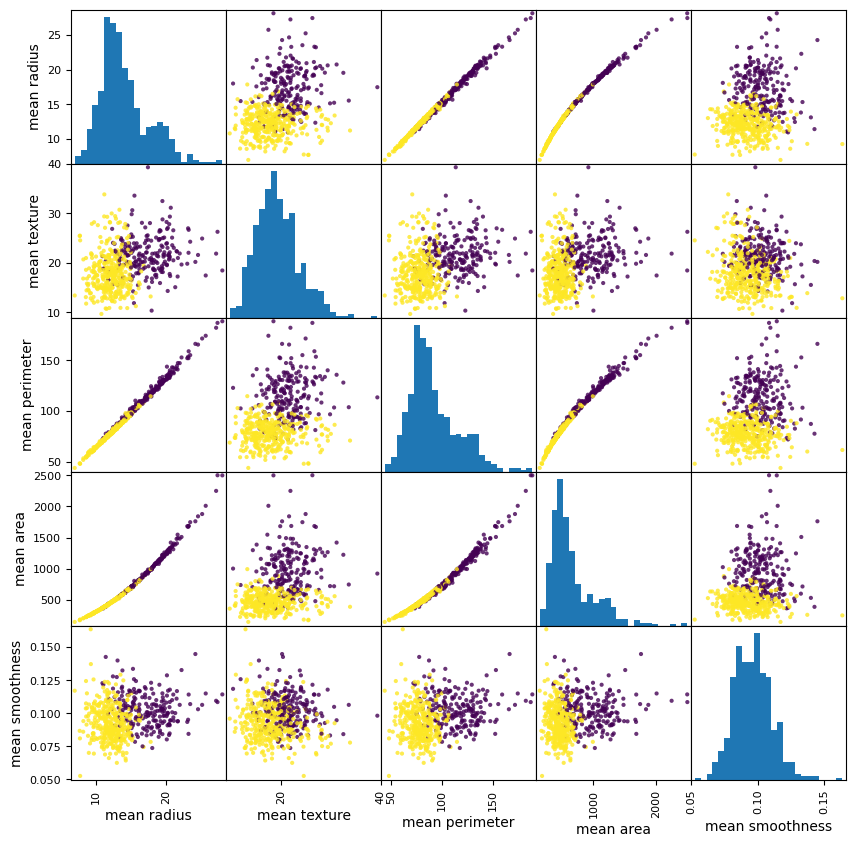

In [9]:
matrix = pd.plotting.scatter_matrix(cancer_df.iloc[:,0:5], c=cancer['target'], diagonal='hist', hist_kwds={'bins':25}, figsize=(10,10), alpha=0.8)

## KNN Model

In [10]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
training_accuracy = []
test_accuracy = []
neighbors_param = range(1,11)

In [11]:
for n_neighbors in neighbors_param:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

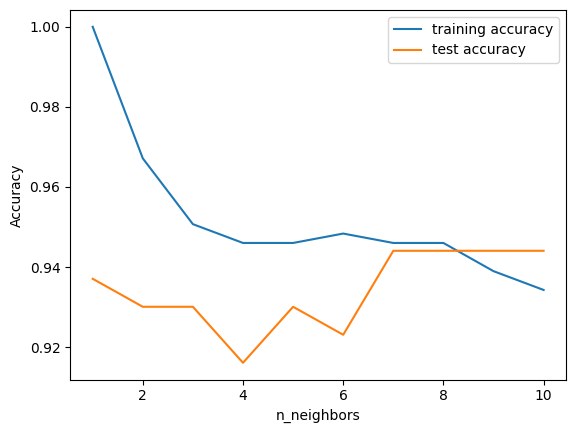

In [12]:
plt.plot(neighbors_param, training_accuracy, label='training accuracy')
plt.plot(neighbors_param, test_accuracy, label = 'test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

we observe peak at n_neighbors=6.

In [13]:
knn6 = KNeighborsClassifier(n_neighbors=6)
knn6.fit(X_train, y_train)
print(f'Training set score: {knn6.score(X_train, y_train):.2f}')
print(f'Test set score: {knn6.score(X_test, y_test):.2f}')

Training set score: 0.95
Test set score: 0.92


Create a dict for tracking scores

In [14]:
scores = defaultdict(list)
scores['models'].append('knn')
scores['train_score'].append(knn6.score(X_train, y_train))
scores['test_score'].append(knn6.score(X_test, y_test))

## Linear Models

plotting a line given slope and intercept


In [15]:
x = np.linspace(-50,100,10)
slope = 0.5
intercept = 10
y = slope * x + intercept

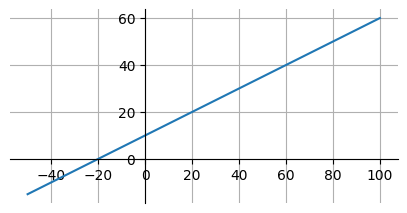

In [16]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
plt.plot(x, y)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.grid(True)
ax.set_aspect('equal')


## Linear Classifiers

In [17]:
X_pair = X_train[:,[7,9]]
padding = 0.005
h = 0.001
x1_min, x1_max = X_pair[:,0].min()-padding, X_pair[:,0].max()+padding
x2_min, x2_max = X_pair[:,1].min()-padding, X_pair[:,1].max()+padding
print(x1_min, x1_max, x2_min, x2_max)
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))
print(f'xx shape: {xx.shape},\nyy shape: {yy.shape}')
grid = np.c_[xx.ravel(), yy.ravel()]
print(f'Grid shape: {grid.shape}')

-0.005 0.1963 0.04496 0.10244
xx shape: (58, 202),
yy shape: (58, 202)
Grid shape: (11716, 2)


In [18]:
logr = LogisticRegression().fit(X_pair, y_train)
svm = LinearSVC().fit(X_pair, y_train)

In [19]:
Z_logr = logr.predict(grid).reshape(xx.shape)
Z_svm = svm.predict(grid).reshape(xx.shape)

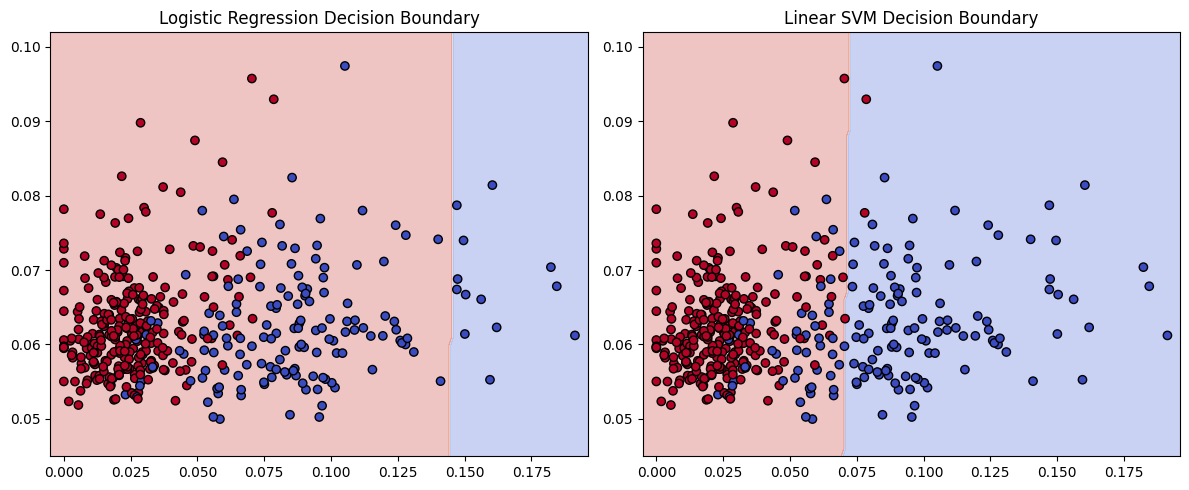

In [20]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_logr, alpha=0.3, cmap='coolwarm')
plt.scatter(X_pair[:, 0], X_pair[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')
# plt.xlim(x1_min, x1_max)
# plt.ylim(x2_min, x2_max)
plt.title('Logistic Regression Decision Boundary')

# SVM
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_svm, alpha=0.3, cmap='coolwarm')
plt.scatter(X_pair[:, 0], X_pair[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')
# plt.xlim(x1_min, x1_max)
# plt.ylim(x2_min, x2_max)
plt.title('Linear SVM Decision Boundary')

plt.tight_layout()
plt.show()

## Model performance on cancer dataset

In [21]:
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
print(f'Training set score: {logreg.score(X_train, y_train):.3f}')
print(f'Test set score: {logreg.score(X_test, y_test):.3f}')

Training set score: 0.958
Test set score: 0.958


In [22]:
scores['models'].append('Logistic Reg, C=1')
scores['train_score'].append(logreg.score(X_train, y_train))
scores['test_score'].append(logreg.score(X_test, y_test))

checking with increased C value

In [23]:
logreg100 = LogisticRegression(C=100, max_iter=20000).fit(X_train, y_train)
print(f'Training set score: {logreg100.score(X_train, y_train):.3f}')
print(f'Test set score: {logreg100.score(X_test, y_test):.3f}')

Training set score: 0.981
Test set score: 0.972


In [24]:
scores['models'].append('Logistic Reg, C=100')
scores['train_score'].append(logreg100.score(X_train, y_train))
scores['test_score'].append(logreg100.score(X_test, y_test))

LogReg with L1 regularization

In [25]:
logreg100_l1 = LogisticRegression(C=100, penalty='l1', solver='liblinear').fit(X_train, y_train)
print(f'Training set score: {logreg100_l1.score(X_train, y_train):.3f}')
print(f'Test set score: {logreg100_l1.score(X_test, y_test):.3f}')

Training set score: 0.986
Test set score: 0.979


In [26]:
scores['models'].append('Logistic Reg, C=100 & L1')
scores['train_score'].append(logreg100_l1.score(X_train, y_train))
scores['test_score'].append(logreg100_l1.score(X_test, y_test))

## Multiclass Classification

Using Linear SVM

In [27]:
X, y = make_blobs(random_state=42)
print(X.shape, y.shape)

(100, 2) (100,)


In [28]:
X[:5,:]

array([[-7.72642091, -8.39495682],
       [ 5.45339605,  0.74230537],
       [-2.97867201,  9.55684617],
       [ 6.04267315,  0.57131862],
       [-6.52183983, -6.31932507]])

In [29]:
np.unique(y)

array([0, 1, 2])

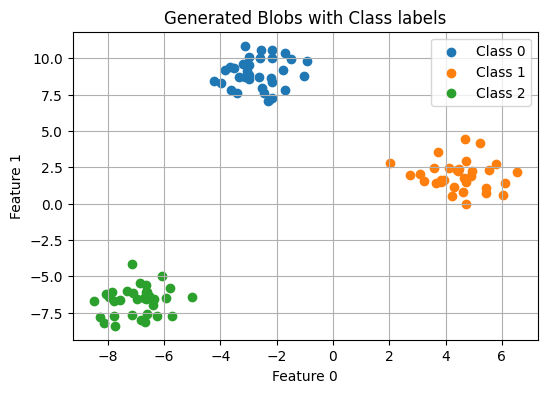

In [30]:
plt.figure(figsize=(6,4))
for class_label in np.unique(y):
    plt.scatter(X[y==class_label,0], X[y==class_label, 1], label=f'Class {class_label}')

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Generated Blobs with Class labels')
plt.legend()
plt.grid(True)


In [31]:
linear_svm = LinearSVC().fit(X, y)
print(f'Coefficient shape: {linear_svm.coef_.shape}')
print(f'Intercept shape: {linear_svm.intercept_.shape}')

Coefficient shape: (3, 2)
Intercept shape: (3,)


Plotting the decision boundaries

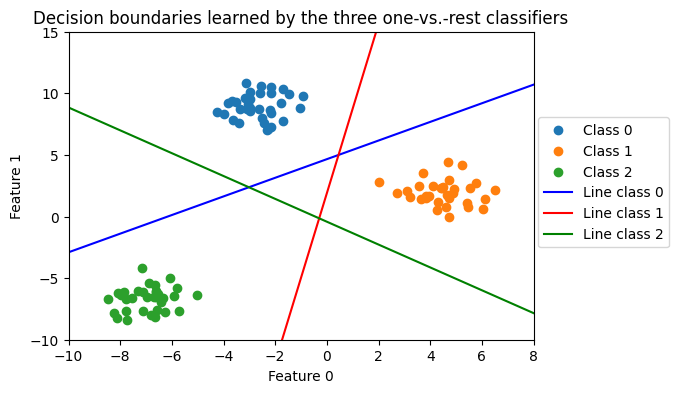

In [32]:
plt.figure(figsize=(6,4))
for class_label in np.unique(y):
    plt.scatter(X[y==class_label,0], X[y==class_label, 1], label=f'Class {class_label}')
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b','r','g']):
    plt.plot(line, -(line*coef[0] + intercept)/coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Decision boundaries learned by the three one-vs.-rest classifiers')
# plt.legend()
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
 'Line class 2'], loc=(1.01, 0.3))

Decision boundaries with predictions

In [33]:
X_pair = X
padding = 1
h = 500
x1_min, x1_max = X_pair[:,0].min()-padding, X_pair[:,0].max()+padding
x2_min, x2_max = X_pair[:,1].min()-padding, X_pair[:,1].max()+padding
print(x1_min, x1_max, x2_min, x2_max)
xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, h),
                     np.linspace(x2_min, x2_max, h))
print(f'xx shape: {xx.shape},\nyy shape: {yy.shape}')
grid = np.c_[xx.ravel(), yy.ravel()]
print(f'Grid shape: {grid.shape}')

-9.487110425712498 7.526064737438632 -9.39495681796181 11.86656431270726
xx shape: (500, 500),
yy shape: (500, 500)
Grid shape: (250000, 2)


In [34]:
Z_svm = linear_svm.predict(grid).reshape(xx.shape)

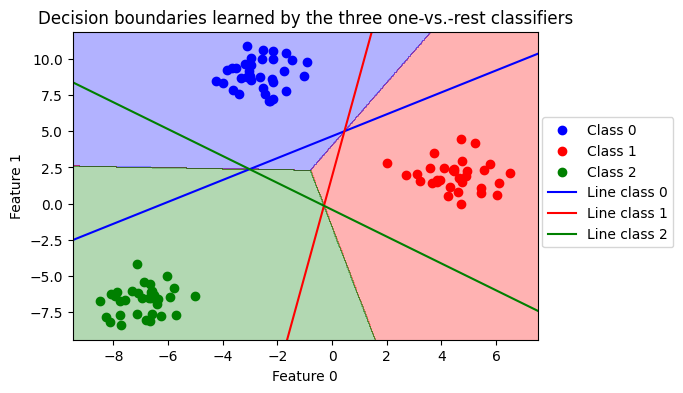

In [35]:
cmap_brg = ListedColormap(['b','r','g'])
plt.figure(figsize=(6,4))

plt.contourf(xx, yy, Z_svm, alpha=0.3, cmap = cmap_brg)

for class_label, color in zip(np.unique(y), ['b','r','g']):
    plt.scatter(X[y==class_label,0], X[y==class_label, 1], label=f'Class {class_label}', c=color)

line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b','r','g']):
    plt.plot(line, -(line*coef[0] + intercept)/coef[1], c=color)

plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Decision boundaries learned by the three one-vs.-rest classifiers')
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
 'Line class 2'], loc=(1.01, 0.3))

## Naive Bayes

BernoulliNB - counts how often every feature of each class is not zero

In [36]:
X = np.array([[0, 1, 0, 1],
[1, 0, 1, 1],
[0, 0, 0, 1],
[1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [37]:
counts = {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)
print(f'Feature counts:\n{counts}')

Feature counts:
{np.int64(0): array([0, 1, 0, 2]), np.int64(1): array([2, 0, 2, 1])}


## Decision Trees

In [38]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [39]:
scores['models'].append('Decision Tree (default)')
scores['train_score'].append(tree.score(X_train, y_train))
scores['test_score'].append(tree.score(X_test, y_test))

applying pre-pruning

In [40]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [41]:
scores['models'].append('Decision Tree (max_depth=4)')
scores['train_score'].append(tree.score(X_train, y_train))
scores['test_score'].append(tree.score(X_test, y_test))

export tree as .dot file

In [42]:
export_graphviz(tree, out_file='DTree.dot', class_names=["malignant", "benign"],
                feature_names=cancer['feature_names'], impurity=False, filled=True)

open .dot file with graphviz

In [43]:
with open("DTree.dot") as f:
    dot_graph = f.read()

In [44]:
# graphviz.Source(dot_graph)

Feature Importance

In [45]:
print(f'Feature importances: \n{tree.feature_importances_}')

Feature importances: 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


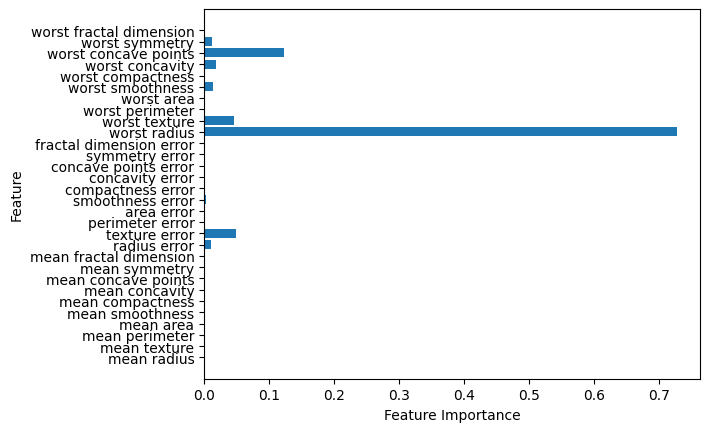

In [46]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
plot_feature_importances_cancer(tree)

## Ensemble of Decision Trees

### Random Forests

RF on two_moons dataset

In [47]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
mx_train, mx_test, my_train, my_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2, min_samples_leaf = 2)
forest.fit(mx_train, my_train)

RandomForestClassifier(min_samples_leaf=2, n_estimators=5, random_state=2)

In [48]:
padding = 0.5
h = 1000
x1_min, x1_max = mx_train[:,0].min() - padding, mx_train[:,0].max() + padding 
x2_min, x2_max = mx_train[:,1].min() - padding, mx_train[:,1].max() + padding
print(x1_min, x1_max, x2_min, x2_max)

xx, yy = np.meshgrid(
    np.linspace(x1_min, x1_max, h),
    np.linspace(x2_min, x2_max, h)
)
print(xx.shape, yy.shape)

grid = np.c_[xx.ravel(), yy.ravel()]
print(grid.shape)

-1.7003499764911922 2.786816198278153 -1.026196384121825 1.917849082876125
(1000, 1000) (1000, 1000)
(1000000, 2)


In [49]:
Z_forest = forest.predict(grid).reshape(xx.shape)

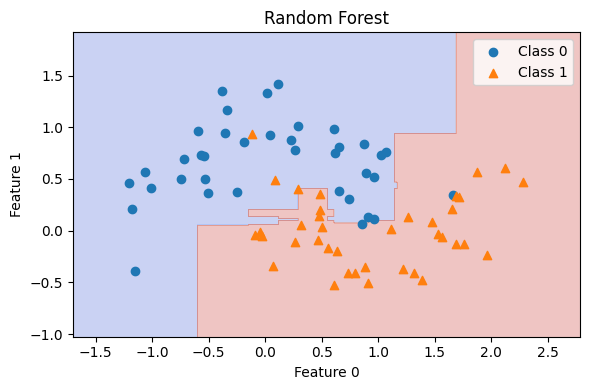

In [50]:
fig = plt.figure(figsize=(6,4))

plt.contourf(xx, yy, Z_forest, alpha=0.3, cmap='coolwarm')

for label, marker in zip(np.unique(my_train), ['o', '^']):
    plt.scatter(mx_train[my_train==label, 0], mx_train[my_train==label, 1], marker=marker, label=f'Class {label}')

plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max) 
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Random Forest')
plt.legend(loc='best')
plt.tight_layout()


### RF on Cancer dataset

In [52]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print(f'Training score: {forest.score(X_train, y_train):.3f}')
print(f'Test score: {forest.score(X_test, y_test):.3f}')

Training score: 1.000
Test score: 0.958


In [53]:
scores['models'].append('Random Forest (n_estimators=100)')
scores['train_score'].append(forest.score(X_train, y_train))
scores['test_score'].append(forest.score(X_test, y_test))

### Gradient Boosted Ensemble

In [56]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


In [57]:
scores['models'].append('Gradient Boosting (default)')
scores['train_score'].append(gbrt.score(X_train, y_train))
scores['test_score'].append(gbrt.score(X_test, y_test))

Reduce Overfitting by stronger pre-pruning

In [68]:
# gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1, learning_rate=0.1)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.958


In [69]:
scores['models'].append('Gradient Boosting (max_depth=1)')
scores['train_score'].append(gbrt.score(X_train, y_train))
scores['test_score'].append(gbrt.score(X_test, y_test))

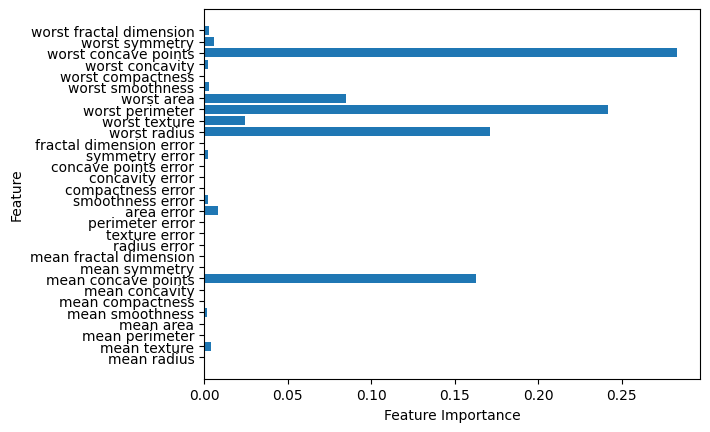

In [70]:
plot_feature_importances_cancer(gbrt)

## Kernelized SVM

### Mock Dataset

In [72]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

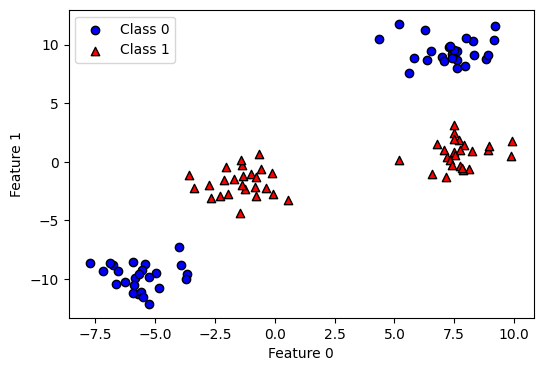

In [86]:
plt.figure(figsize=(6,4))

plot_scatter(X, y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1") 
plt.legend()

Applying Linear SVC

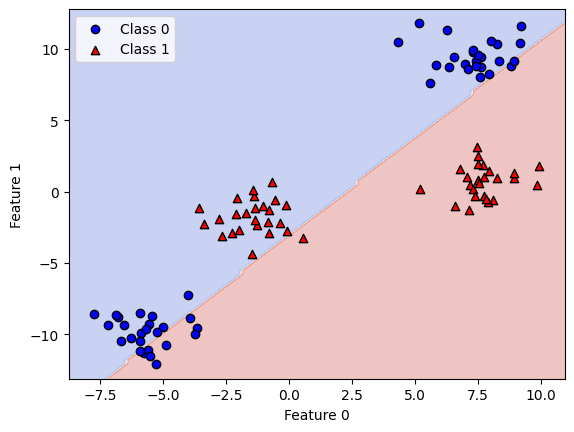

In [89]:
linear_svm = LinearSVC().fit(X, y)
plot_2d_separator(linear_svm, X, 1, 100)
plot_scatter(X, y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1") 
plt.legend()

Adding a non-linear feature

In [96]:
X_new = np.hstack([X, X[:, 1:]**2])
X_new.shape

(100, 3)

plot the dataset in 3-D

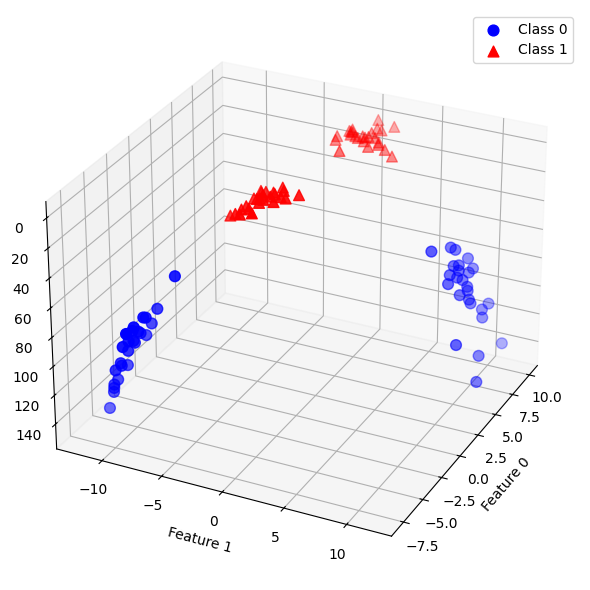

In [102]:
figure = plt.figure(figsize=(8,6))

ax = figure.add_subplot(111, projection='3d', elev=-152, azim=-26)
mask = y==0

ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', s=60, label='Class 0')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', s=60, label='Class 1')

ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')
ax.set_zlabel('Feature1 ** 2')
ax.legend()

plt.tight_layout()
plt.show()

Fitting a linear model to the augmented data

In [104]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_.ravel()
print(coef)
print(intercept)

[ 0.12923289 -0.21791697 -0.05935616]
[1.17022536]


show decision boundary

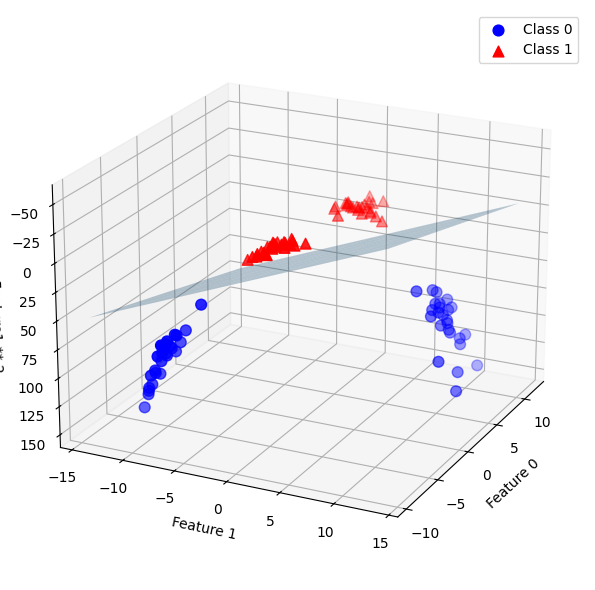

In [117]:
figure = plt.figure(figsize=(8,6))

ax = figure.add_subplot(111, projection='3d', elev=-159, azim=-26)
mask = y==0
padding = 2
xx = np.linspace(X_new[:, 0].min() - padding, X_new[:, 0].max() + padding, 50)
yy = np.linspace(X_new[:, 1].min() - padding, X_new[:, 1].max() + padding, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]

ax.plot_surface(XX, YY, ZZ, rstride = 8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', s=60, label='Class 0')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', s=60, label='Class 1')

ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')
ax.set_zlabel('Feature1 ** 2')
ax.legend()

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Feature 1')

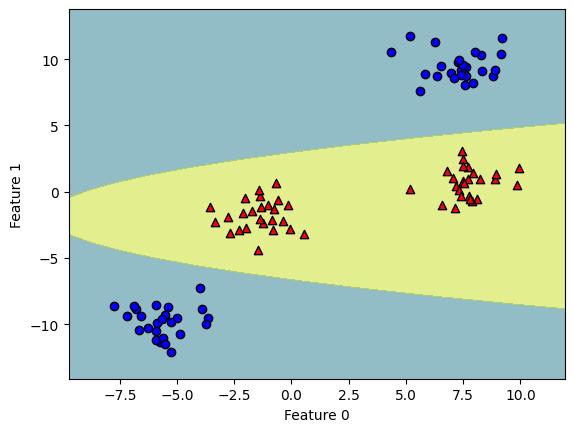

In [138]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], alpha=0.5)
plot_scatter(X, y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### Understanding SVMs

In [243]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

In [244]:
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)

In [245]:
def plot_scatter_svm(X, y, ax=None):
    if ax is None:
        ax = plt.gca()
    for label, marker, color in zip(np.unique(y), ['o', '^'], ['b', 'r']):
        ax.scatter(X[y==label, 0], X[y==label, 1], s=70, linewidths=2,
                    marker=marker, c=color, edgecolors='black')

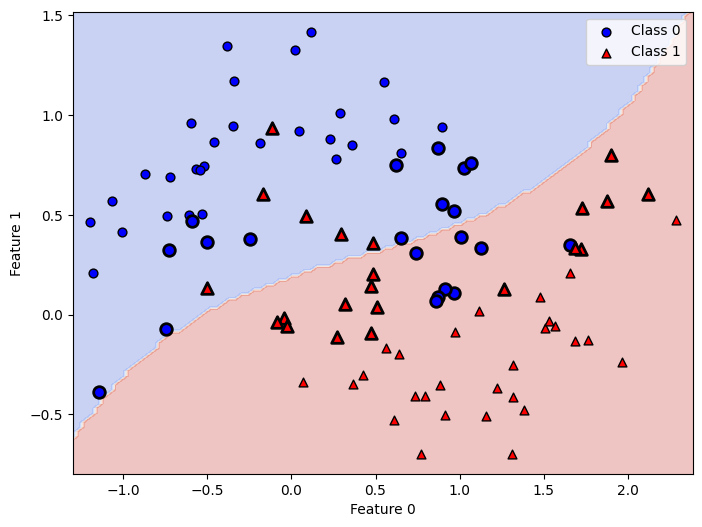

In [246]:
plt.figure(figsize=(8,6))

plot_2d_separator(svm, X, 0.1, 100)
plot_scatter(X, y)

sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0

plot_scatter_svm(sv, sv_labels)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend()

Tuning SVM parameters

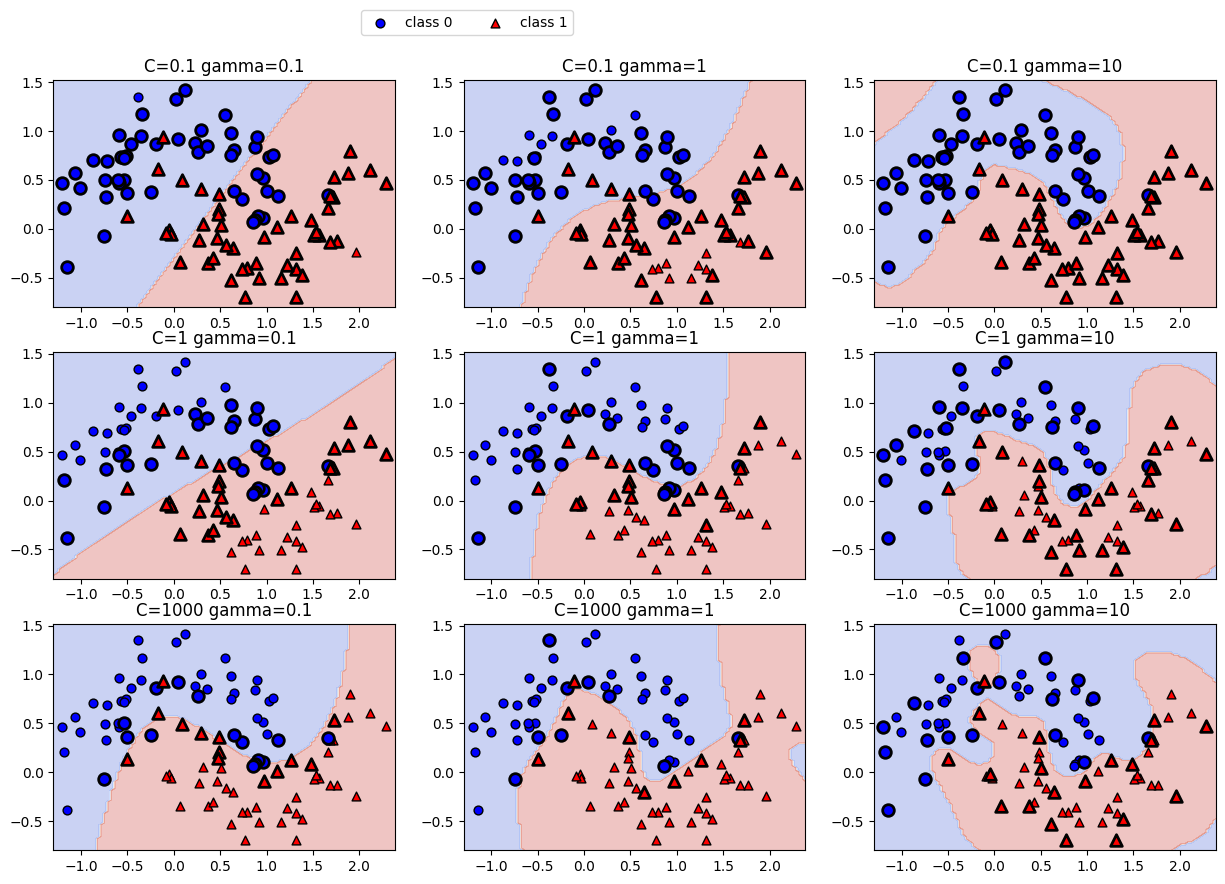

In [251]:
fig, axes = plt.subplots(3,3, figsize=(15,10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        svm = SVC(kernel='rbf', C=10**C, gamma=10**gamma).fit(X, y)
        plot_2d_separator(svm, X, 0.1, 100, a)
        plot_scatter(X, y, a)

        sv = svm.support_vectors_
        sv_labels = svm.dual_coef_.ravel() > 0

        plot_scatter_svm(sv, sv_labels, a)
        a.set_title(f'C={10**C} gamma={10**gamma}')

axes[0, 0].legend(["class 0", "class 1"], loc=(.9, 1.2), ncols=2)

### Applying SVM on Cancer dataset

In [255]:
svc = SVC()
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.92
Accuracy on test set: 0.92


In [257]:
scores['models'].append('SVC (default)')
scores['train_score'].append(svc.score(X_train, y_train))
scores['test_score'].append(svc.score(X_test, y_test))

Checking min and max values for each feature

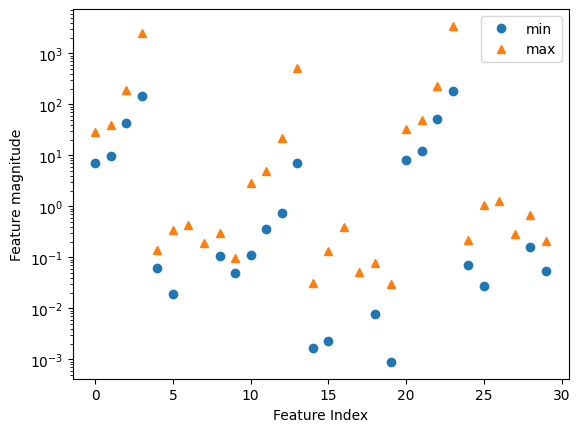

In [260]:
plt.plot(X_train.min(axis=0), 'o', label='min')
plt.plot(X_train.max(axis=0), '^', label='max')
plt.legend()
plt.xlabel("Feature Index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

Preprocessing: rescaling between 0 and 1

In [261]:
min_per_feature = X_train.min(axis=0)

range_per_feature = X_train.max(axis=0) - X_train.min(axis=0)

X_train_scaled = (X_train - min_per_feature) / range_per_feature

print(f'Min for each feature:\n{X_train_scaled.min(axis=0)}')
print(f'Max for each feature:\n{X_train_scaled.max(axis=0)}')

Min for each feature:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Max for each feature:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [262]:
X_test_scaled = (X_test - min_per_feature) / range_per_feature

In [263]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print(f"Accuracy on training set: {svc.score(X_train_scaled, y_train):.3f}")
print(f"Accuracy on test set: {svc.score(X_test_scaled, y_test):.3f}")

Accuracy on training set: 0.979
Accuracy on test set: 0.979


In [264]:
scores['models'].append('SVC after scaling(default)')
scores['train_score'].append(svc.score(X_train_scaled, y_train))
scores['test_score'].append(svc.score(X_test_scaled, y_test))

Tuning the SVC model

In [275]:
svc = SVC(C=10, gamma=0.1)
svc.fit(X_train_scaled, y_train)

print(f"Accuracy on training set: {svc.score(X_train_scaled, y_train):.3f}")
print(f"Accuracy on test set: {svc.score(X_test_scaled, y_test):.3f}")

Accuracy on training set: 0.981
Accuracy on test set: 0.986


In [276]:
scores['models'].append('SVC after scaling(C=10, gamma=0.1)')
scores['train_score'].append(svc.score(X_train_scaled, y_train))
scores['test_score'].append(svc.score(X_test_scaled, y_test))

## Model Performances

In [277]:
scores_df = pd.DataFrame(data=scores)
scores_df = scores_df.round(3)
scores_df = scores_df.sort_values(by=['test_score', 'train_score'], ascending=False)
scores_df

,models,train_score,test_score
11,"SVC after scaling(C=10, gamma=0.1)",0.981,0.986
3,"Logistic Reg, C=100 & L1",0.986,0.979
10,SVC after scaling(default),0.979,0.979
2,"Logistic Reg, C=100",0.981,0.972
6,Random Forest (n_estimators=100),1.000,0.958
7,Gradient Boosting (default),1.000,0.958
8,Gradient Boosting (max_depth=1),0.988,0.958
1,"Logistic Reg, C=1",0.958,0.958
5,Decision Tree (max_depth=4),0.988,0.951
4,Decision Tree (default),1.000,0.937


## Uncertainty Estimates from Classifiers

In [279]:
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

In [280]:
y_named = np.array(['blue', 'red'])[y]

X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

In [281]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

### Decision Function

In [282]:
print(f'Shape of X_test: {X_test.shape}')
print(f'Decision function shape: {gbrt.decision_function(X_test).shape}')

Shape of X_test: (25, 2)
Decision function shape: (25,)


In [283]:
print(f'Decision function:\n{gbrt.decision_function(X_test)[:6]}')

Decision function:
[ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081]


In [284]:
print("Thresholded decision function:\n{}".format(
gbrt.decision_function(X_test) > 0))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Thresholded decision function:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [285]:
gbrt.classes_

array(['blue', 'red'], dtype='<U4')

### Predict Probabilities

In [286]:
print(f'Shape of probabilities: {gbrt.predict_proba(X_test).shape}')

Shape of probabilities: (25, 2)


In [289]:
print('first few entries')
print(gbrt.predict_proba(X_test)[:6])

first few entries
[[0.01573626 0.98426374]
 [0.84575653 0.15424347]
 [0.98112869 0.01887131]
 [0.97407033 0.02592967]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


### Uncertainty in Multiclass Classification

In [290]:
from sklearn.datasets import load_iris

In [291]:
iris = load_iris()

In [292]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

In [293]:
gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [295]:
print("Decision function shape: {}".format(gbrt.decision_function(X_test).shape))
print("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6]))

Decision function shape: (38, 3)
Decision function:
[[-0.89604809  1.14724958 -0.82754003]
 [ 1.16113086 -0.80789044 -0.82827067]
 [-0.89091511 -0.77671169  1.19653416]
 [-0.89604809  1.14724958 -0.82754003]
 [-0.89763468  0.96497584 -0.10374792]
 [ 1.16113086 -0.80789044 -0.82827067]]
